In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\harshit.aggarwal\Downloads\house-prices-advanced-regression-techniques\train.csv')

In [3]:
pred_karo=pd.read_csv(r'C:\Users\harshit.aggarwal\Downloads\house-prices-advanced-regression-techniques\test.csv')

In [4]:
y=df.SalePrice
l=df.copy()
df.dropna(axis=0,subset=['SalePrice'],inplace=True)
df.drop(['SalePrice'],axis=1,inplace=True)

In [5]:
missing_cols=df.isnull().sum()
print((missing_cols[missing_cols>0]/1460)*100)

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [6]:
df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','MasVnrType'],axis=1,inplace=True)
pred_karo.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','MasVnrType'],axis=1,inplace=True)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,random_state=2)

In [8]:
xtrain_cat=x_train.select_dtypes(include=['object'])
xtest_cat=x_test.select_dtypes(include=['object'])

In [9]:
xtrain_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
37,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
1370,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,...,SBrkr,TA,Typ,Detchd,Fin,TA,TA,Y,WD,Normal
418,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,FuseF,TA,Typ,Detchd,Unf,TA,TA,P,WD,AdjLand
611,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1212,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,N,WD,Normal


In [10]:
pred_cat=pred_karo.select_dtypes(include=['object'])

In [11]:
for col in xtrain_cat.columns:
    print(f"{col} = {xtrain_cat[col].nunique()}")

MSZoning = 5
Street = 2
LotShape = 4
LandContour = 4
Utilities = 2
LotConfig = 5
LandSlope = 3
Neighborhood = 25
Condition1 = 9
Condition2 = 7
BldgType = 5
HouseStyle = 8
RoofStyle = 6
RoofMatl = 7
Exterior1st = 14
Exterior2nd = 16
ExterQual = 4
ExterCond = 5
Foundation = 6
BsmtQual = 4
BsmtCond = 4
BsmtExposure = 4
BsmtFinType1 = 6
BsmtFinType2 = 6
Heating = 6
HeatingQC = 5
CentralAir = 2
Electrical = 4
KitchenQual = 4
Functional = 7
GarageType = 6
GarageFinish = 3
GarageQual = 5
GarageCond = 5
PavedDrive = 3
SaleType = 9
SaleCondition = 6


In [12]:
cl=['Neighborhood','Exterior1st','Exterior2nd']
xtrain_cat.drop(cl,axis=1,inplace=True)
xtest_cat.drop(cl,axis=1,inplace=True)
pred_karo.drop(cl,axis=1,inplace=True)

In [13]:
good_cols=list(set(xtrain_cat.columns)&set(xtest_cat.columns))


In [14]:
from sklearn.preprocessing import OrdinalEncoder
my_ord = OrdinalEncoder()
xtrain_cat[good_cols]=my_ord.fit_transform(xtrain_cat[good_cols])
xtest_cat[good_cols]=my_ord.fit_transform(xtest_cat[good_cols])

In [15]:
x_train=x_train.select_dtypes(exclude=['object'])
x_test=x_test.select_dtypes(exclude=['object'])
from sklearn.impute import SimpleImputer
my_imp=SimpleImputer(strategy = 'mean')
xtrain_imp=pd.DataFrame(my_imp.fit_transform(x_train))
xtest_imp=pd.DataFrame(my_imp.transform(x_test))
xtr_cat=pd.DataFrame(my_imp.fit_transform(xtrain_cat))
xte_cat=pd.DataFrame(my_imp.transform(xtest_cat))
xte_cat.columns=xtest_cat.columns
xtr_cat.columns=xtrain_cat.columns
xtrain_imp.columns=x_train.columns
xtest_imp.columns=x_test.columns

In [16]:
xtrain_final = pd.concat([xtr_cat,xtrain_imp],axis=1)
xtest_final= pd.concat([xte_cat,xtest_imp],axis=1)

<Axes: >

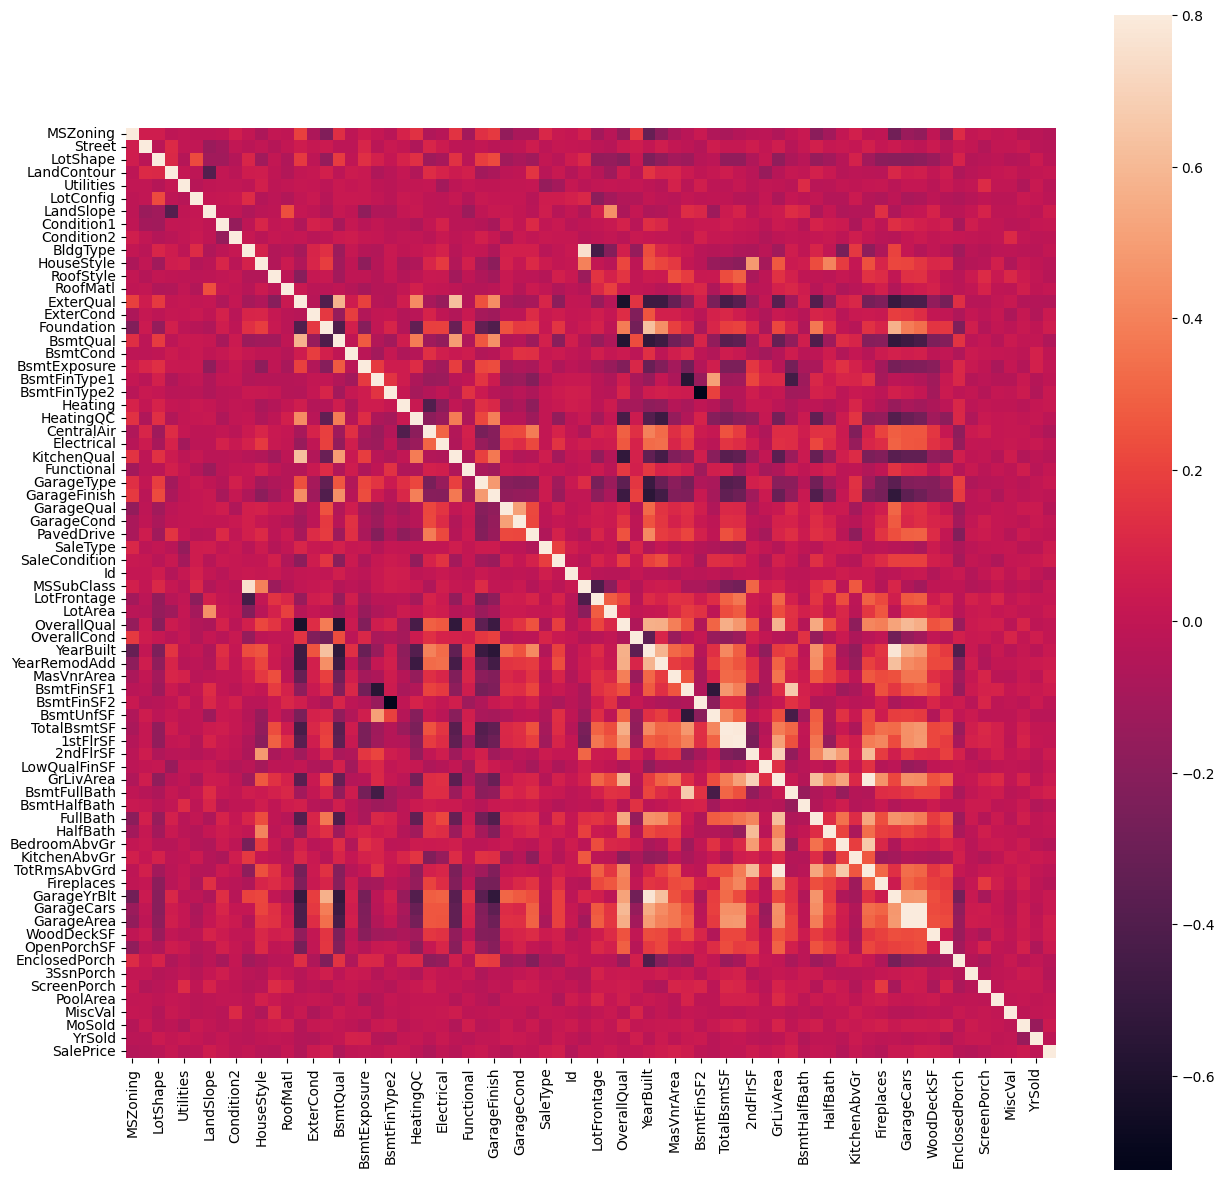

In [17]:
trial=pd.concat([xtrain_final,y_train],axis=1)
corrmat = trial.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corrmat,vmax=.8,square=True)

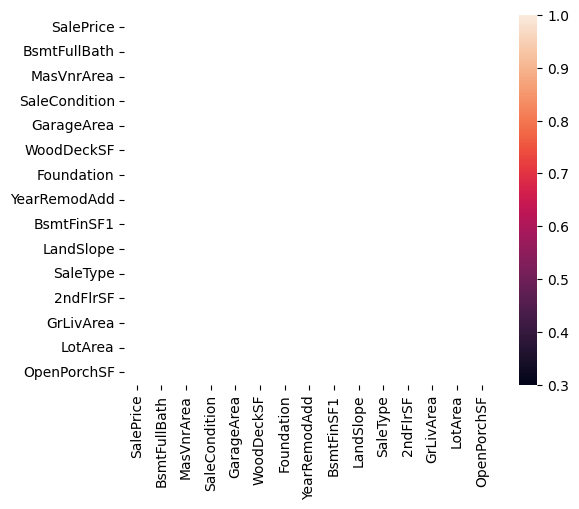

In [18]:
k=15
st=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(trial[st].values.T)

hm=sns.heatmap(cm,annot=True,vmax=1,vmin=0.3,square=True,fmt='.2f',yticklabels=st.values,xticklabels=st.values)
plt.show()

In [19]:
features=['BsmtFullBath','MasVnrArea','SaleCondition','GarageArea','WoodDeckSF','Foundation','YearRemodAdd','BsmtFinSF1','LandSlope','SaleType','GrLivArea','LotArea','OpenPorchSF']
xtrain_final=xtrain_final[features]
xtest_final=xtest_final[features]

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
#model=RandomForestRegressor(n_estimators=100,random_state=1)
#model.fit(xtrain_final,y_train)
#temp_preds=model.predict(xtest_final)
#print(mean_absolute_error(temp_preds,y_test))

In [21]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(xtrain_final,y_train)
temp_preds2=model1.predict(xtest_final)
print(mean_absolute_error(temp_preds2,y_test))

29527.15007320134


In [22]:
pred_cat[good_cols]=my_ord.fit_transform(pred_cat[good_cols])

In [23]:
pred_cat.drop(cl,axis=1,inplace=True)

In [24]:
pred_num=pred_karo.select_dtypes(exclude=['object'])
pred_num_imp=pd.DataFrame(my_imp.fit_transform(pred_num))
pred_num_imp.columns=pred_num.columns

pred_cat_imp=pd.DataFrame(my_imp.fit_transform(pred_cat))
pred_cat_imp.columns=pred_cat.columns
pred_final=pd.concat([pred_cat_imp,pred_num_imp],axis=1)
pred_trial=pred_final[features]

In [25]:
pred_final=model1.predict(pred_trial)

NameError: name 'model' is not defined

In [ ]:
print(len(pred_final))

In [ ]:
output=pd.DataFrame({'SalePrice':pred_final})
output.to_csv('Own_submission2.csv',index=True)